In [ ]:
from nilmtk import DataSet
from nilmtk.utils import print_dict

In [54]:
train = DataSet('/home/divansh/Desktop/Coursework/BTP/MultiApplianceAnomalyDetection/datasets/redd-low.h5')

In [55]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

%matplotlib inline
rcParams['figure.figsize'] = (13, 6)

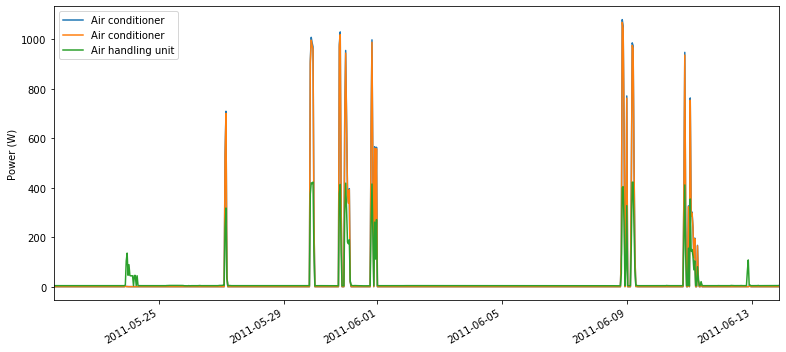

In [57]:
# train.set_window(start="2011-05-24", end="2011-06-02")
# for building in range(1):
building=6
# yyyy-mm-dd
train_elec = train.buildings[building].elec
train_elec['air conditioner'].plot()
train_elec['air handling unit'].plot()

### THIS IS THE METHOD

In [58]:
df = train_elec.dataframe_of_meters()

Loading data for meter ElecMeterID(instance=17, building=6, dataset='REDD')     
Done loading data all meters for this chunk.


In [60]:
df.shape

(674249, 16)

(0, 2000)

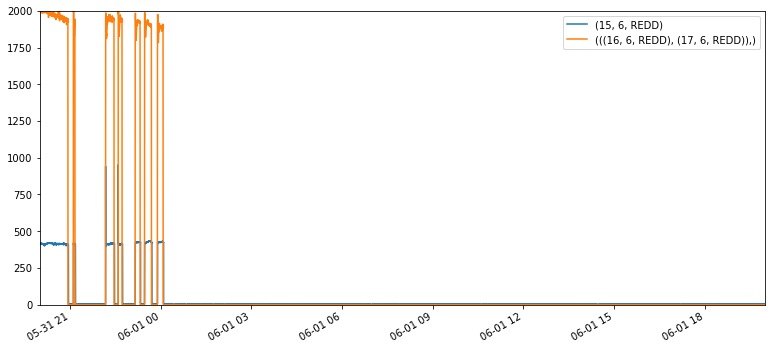

In [78]:
ax = df.dropna()[df.columns[[14, 15]]].plot()
ax.set_xlim('2011-06-01','2011-06-02')
ax.set_ylim(0,2000)

In [70]:
df.dropna().head()

,"(1, 6, REDD)","(2, 6, REDD)","(3, 6, REDD)","(4, 6, REDD)","(5, 6, REDD)","(6, 6, REDD)","(7, 6, REDD)","(8, 6, REDD)","(9, 6, REDD)","(10, 6, REDD)","(11, 6, REDD)","(12, 6, REDD)","(13, 6, REDD)","(14, 6, REDD)","(15, 6, REDD)","(((16, 6, REDD), (17, 6, REDD)),)"
2011-05-21 15:39:21-04:00,46.970001,248.915009,5.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,27.0,94.0,1.0,115.0,4.0,0.0
2011-05-21 15:39:24-04:00,46.875000,259.779999,5.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,27.0,94.0,1.0,115.0,4.0,0.0
2011-05-21 15:39:27-04:00,46.939999,260.459991,5.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,27.0,94.0,1.0,115.0,4.0,0.0
2011-05-21 15:39:30-04:00,46.885002,258.779999,5.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,27.0,94.0,1.0,115.0,4.0,0.0
2011-05-21 15:39:33-04:00,46.845001,260.154999,5.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,27.0,94.0,1.0,115.0,4.0,0.0
